In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%matplotlib notebook

In [2]:
covid_data = pd.read_csv("covid_19_india.csv")
state_data = pd.read_csv("StatewiseTestingDetails.csv")
ind_data = pd.read_csv("IndividualDetails.csv")
pop_data = pd.ExcelFile("Indian States Population and Area.xlsx")
indian_states_df = pop_data.parse('Sheet1')

In [5]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid_data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [8]:
covid_data.shape
#contains 9291 rows and 9 rows

(9291, 9)

In [9]:
covid_data.isna().sum()
#no null values present in the dataset

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [17]:
#calculates recent records of each state
covid_data_latest = covid_data[covid_data['Date']=="09/12/20"]
covid_data_latest

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9256,9257,09/12/20,8:00 AM,Andaman and Nicobar Islands,-,-,4647,61,4778
9257,9258,09/12/20,8:00 AM,Andhra Pradesh,-,-,860368,7042,872839
9258,9259,09/12/20,8:00 AM,Arunachal Pradesh,-,-,15690,55,16437
9259,9260,09/12/20,8:00 AM,Assam,-,-,209447,997,214019
9260,9261,09/12/20,8:00 AM,Bihar,-,-,232563,1300,239322
9261,9262,09/12/20,8:00 AM,Chandigarh,-,-,16981,296,18239
9262,9263,09/12/20,8:00 AM,Chhattisgarh,-,-,227158,3025,249699
9263,9264,09/12/20,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,3330,2,3351
9264,9265,09/12/20,8:00 AM,Delhi,-,-,565039,9763,597112
9265,9266,09/12/20,8:00 AM,Goa,-,-,46924,701,48935


In [19]:
# On inspecting this data, we see that India has a total of 9735850 cases till 9th December 2020.
covid_data_latest['Confirmed'].sum()

9735850

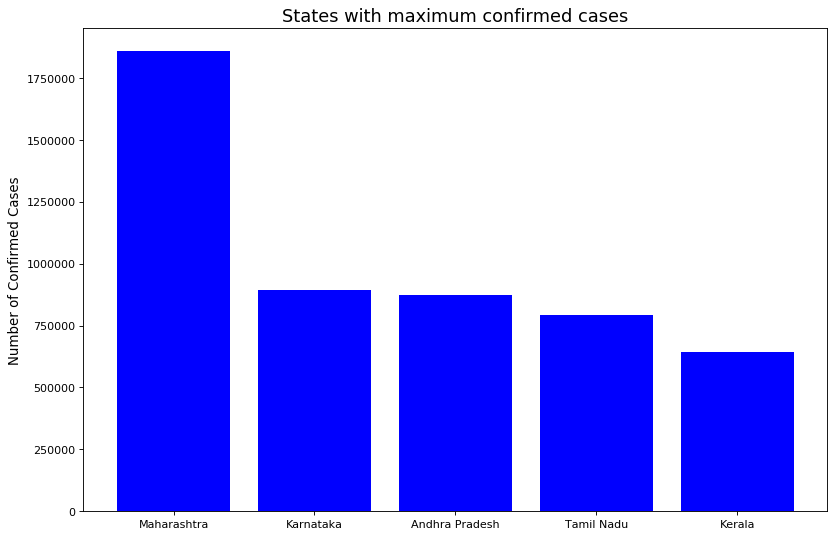

In [28]:
#STATEWISE FIGURES WITH MAXIMUM CASES
#Maharashtra has maximum cases more than 1750000 followed ny Karnataka, Andhra Pradesh, Tamil Nadu and Kerala
covid_data_latest = covid_data_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid_data_latest['State/UnionTerritory'][:5], covid_data_latest['Confirmed'][:5],align='center',color='blue')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

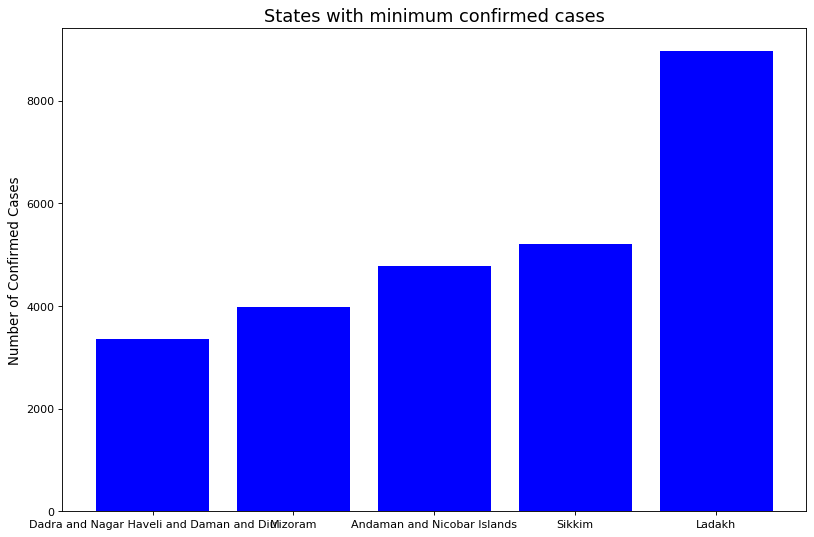

In [27]:
#STATEWISE FIGURES WITH MAXIMUM CASES
covid_data_latest = covid_data_latest.sort_values(by=['Confirmed'], ascending = True)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid_data_latest['State/UnionTerritory'][:5], covid_data_latest['Confirmed'][:5],align='center',color='blue')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with minimum confirmed cases', size = 16)
plt.show()

In [29]:
covid_data_latest['Deaths'].sum()

141360

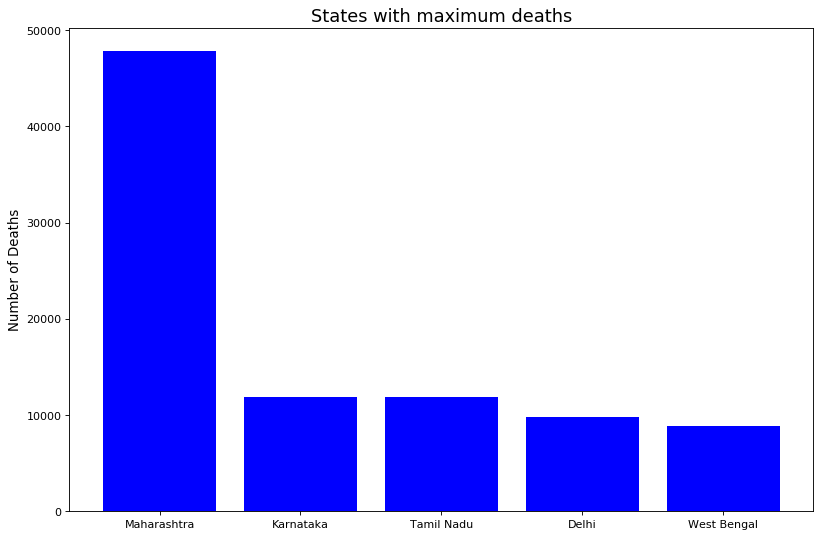

In [30]:
covid_data_latest = covid_data_latest.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid_data_latest['State/UnionTerritory'][:5], covid_data_latest['Deaths'][:5], align='center',color='blue')
plt.ylabel('Number of Deaths', size = 12)
plt.title('States with maximum deaths', size = 16)
plt.show()

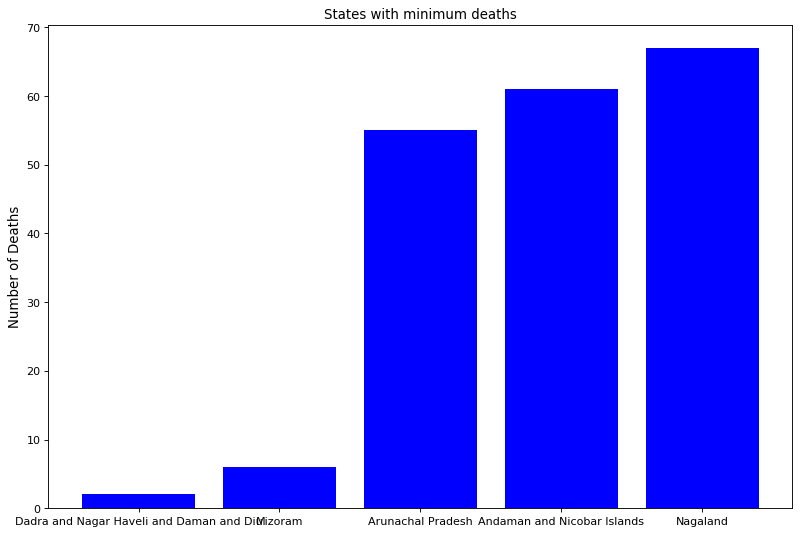

In [38]:
covid_data_latest = covid_data_latest.sort_values(by=['Deaths'], ascending = True)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid_data_latest['State/UnionTerritory'][:5], covid_data_latest['Deaths'][:5], align='center',color='blue')
plt.ylabel('Number of Deaths', size = 12)
plt.title('States with minimum deaths', size = 12)
plt.show()

In [39]:
#number of deaths per confirmed cases in different states to gain a better idea about the healthcare facilities available.
covid_data_latest['Deaths/Confirmed Cases'] = (covid_data_latest['Confirmed']/covid_data_latest['Deaths']).round(2)
covid_data_latest['Deaths/Confirmed Cases'] = [np.nan if x == float("inf") else x for x in covid_data_latest['Deaths/Confirmed Cases']]
covid_data_latest = covid_data_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True, na_position='last')
covid_data_latest.iloc[:10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
9282,9283,09/12/20,8:00 AM,Punjab,-,-,145093,4964,157331,31.69
9275,9276,09/12/20,8:00 AM,Maharashtra,-,-,1737080,47827,1859367,38.88
9284,9285,09/12/20,8:00 AM,Sikkim,-,-,4735,117,5215,44.57
9266,9267,09/12/20,8:00 AM,Gujarat,-,-,203111,4110,221493,53.89
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995,57.60
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141,60.55
9281,9282,09/12/20,8:00 AM,Puducherry,-,-,36308,615,37311,60.67
9264,9265,09/12/20,8:00 AM,Delhi,-,-,565039,9763,597112,61.16
9268,9269,09/12/20,8:00 AM,Himachal Pradesh,-,-,37871,753,46201,61.36
9261,9262,09/12/20,8:00 AM,Chandigarh,-,-,16981,296,18239,61.62


In [43]:
#However, these statistics do not always lend a clear picture. India is a country of varying demographics and no two states are the same. Maybe equating the figures to the estimated population of a state may lend a better idea to the entire picture.

indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [44]:
#here we drop the columns which are not required in our analysis
covid_data_latest = covid_data_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
covid_data_latest.shape

(35, 5)

In [54]:
#changing name of column
indian_states_df = indian_states_df[['State', 'Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory', 'Population']
indian_states_df.head()

KeyError: "None of [Index(['State', 'Aadhaar assigned as of 2019'], dtype='object')] are in the [columns]"

In [56]:
#merge main dataset with population dataset and create a new column Cases/10million
covid_data_latest = pd.merge(covid_data_latest, indian_states_df, on="State/UnionTerritory")
covid_data_latest['Cases/10million'] = (covid_data_latest['Confirmed']/covid_data_latest['Population'])*10000000
covid_data_latest.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population_x,Cases/10million,Population_y,Population_x,Population_y,Population
0,Punjab,145093,4964,157331,31.69,30355185,51830.025085,30355185,30355185,30355185,30355185
1,Maharashtra,1737080,47827,1859367,38.88,114063427,163011.672444,114063427,114063427,114063427,114063427
2,Sikkim,4735,117,5215,44.57,578914,90082.464753,578914,578914,578914,578914
3,Gujarat,203111,4110,221493,53.89,62097024,35668.859107,62097024,62097024,62097024,62097024
4,West Bengal,475425,8820,507995,57.60,91928327,55259.898290,91928327,91928327,91928327,91928327


In [57]:
covid_data_latest.fillna(0, inplace=True)
covid_data_latest.sort_values(by='Cases/10million', ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population_x,Cases/10million,Population_y,Population_x,Population_y,Population
14,Ladakh,8056,122,8969,73.52,210156,426778.202859,210156,210156,210156,210156
28,Assam,209447,997,214019,214.66,6755448,316809.484730,6755448,6755448,6755448,6755448
12,Goa,46924,701,48935,69.81,1587012,308346.754782,1587012,1587012,1587012,1587012
6,Puducherry,36308,615,37311,60.67,1286189,290089.559155,1286189,1286189,1286189,1286189
7,Delhi,565039,9763,597112,61.16,21763471,274364.323595,21763471,21763471,21763471,21763471
23,Andhra Pradesh,860368,7042,872839,123.95,49145456,177603.194892,49145456,49145456,49145456,49145456
29,Kerala,582351,2472,644696,260.80,36475649,176746.957950,36475649,36475649,36475649,36475649
1,Maharashtra,1737080,47827,1859367,38.88,114063427,163011.672444,114063427,114063427,114063427,114063427
9,Chandigarh,16981,296,18239,61.62,1131522,161189.972444,1131522,1131522,1131522,1131522
15,Karnataka,858370,11880,895284,75.36,62462743,143330.881258,62462743,62462743,62462743,62462743


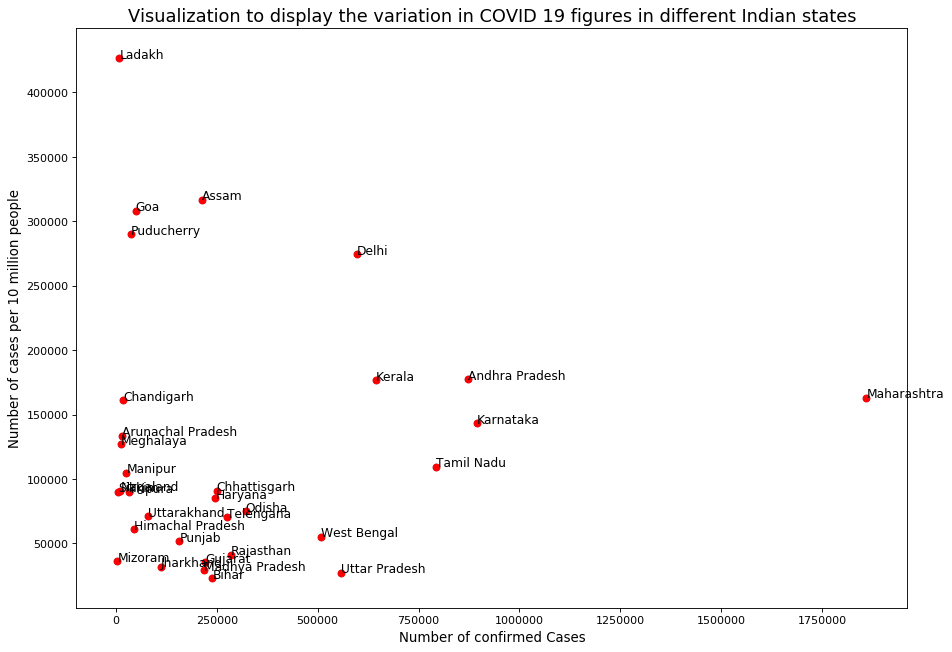

In [65]:
data = covid_data_latest[(covid_data_latest['Confirmed']>=1000) | (covid_data_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid_data_latest['Confirmed'], covid_data_latest['Cases/10million'], alpha=0.5)
plt.xlabel('Number of confirmed Cases', size=12)
plt.ylabel('Number of cases per 10 million people', size=12)
plt.scatter(data['Confirmed'], data['Cases/10million'], color="red")
for i in range(data.shape[0]):
    plt.annotate(data['State/UnionTerritory'].tolist()[i], xy=(data['Confirmed'].tolist()[i], data['Cases/10million'].tolist()[i]),xytext = (data['Confirmed'].tolist()[i]+1.0, data['Cases/10million'].tolist()[i]+12.0), size=11)
    plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=16)
plt.show()

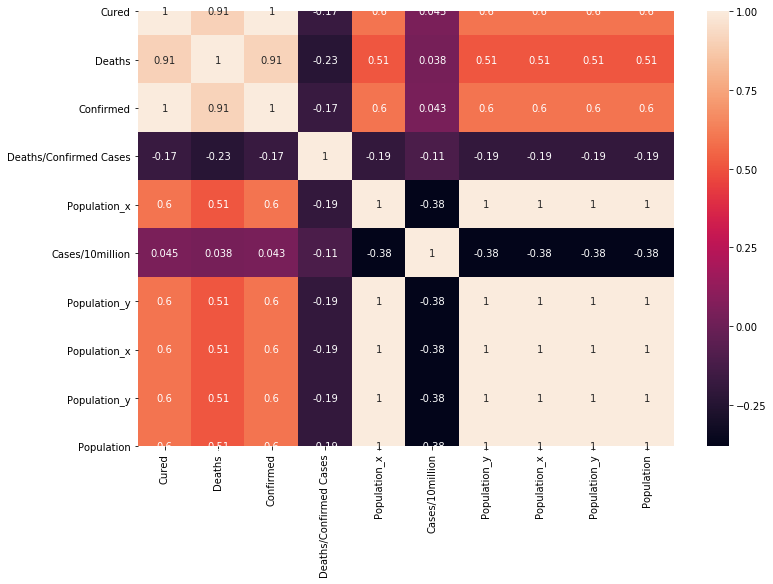

In [67]:
#we have six vital features for every state, we can have a look at how these features are co-related to each other and derive some insights from that.

plt.figure(figsize = (12,8))
sns.heatmap(covid_data_latest.corr(), annot=True)
#measures like Confirmed, Cured, Deaths and Cases/10 million are very much co-related and we do not fret to realise the reason.

#Individual Data Analysis

In [5]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 11 columns):
id                    18032 non-null int64
government_id         2518 non-null object
diagnosed_date        18032 non-null object
age                   1700 non-null object
gender                3884 non-null object
detected_city         2163 non-null object
detected_district     14674 non-null object
detected_state        18032 non-null object
nationality           1608 non-null object
status_change_date    17922 non-null object
notes                 16714 non-null object
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [9]:
#data contains large number of missing values
ind_data.isna().sum()

id                        0
government_id         15514
diagnosed_date            0
age                   16332
gender                14148
detected_city         15869
detected_district      3358
detected_state            0
nationality           16424
status_change_date      110
notes                  1318
dtype: int64

In [12]:
#first case in India was that of a female of age 20 who came from Wuhan to Thrissur in Kerela
ind_data.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

In [13]:
#individual data is grouped in terms of cities in which the cases were found
ind_grouped_district = ind_data.groupby('detected_district')
ind_grouped_district = ind_grouped_district['id']
ind_grouped_district.columns = ['count']
ind_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       2268
Ahmadabad    1192
Indore        841
Pune          591
Jaipur        578
Name: id, dtype: int64

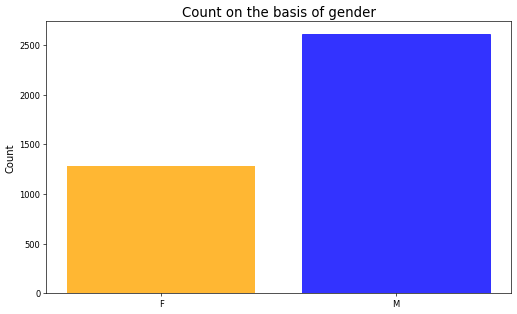

In [23]:
#men are more affected by the virus
ind_grouped_gender = ind_data.groupby('gender')#data is grouped based on gender
ind_grouped_gender = pd.DataFrame(ind_grouped_gender.size().reset_index(name = "count"))
ind_grouped_gender.head()
plt.figure(figsize=(10,6), dpi=60)
barlist = plt.bar(ind_grouped_gender['gender'],ind_grouped_gender['count'], align = 'center', color='orange', alpha=0.8)
barlist[1].set_color('b')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

In [4]:
ind_grouped_date = ind_data.groupby('diagnosed_date')#grouping the data according to the diagnosed date
#finds count of number of cases detected in India each day
ind_grouped_date = pd.DataFrame(ind_grouped_date.size().reset_index(name = "count"))
ind_grouped_date[['Day','Month','Year']] = ind_grouped_date.diagnosed_date.apply(lambda x: pd.Series(str(x).split("/")))
ind_grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
ind_grouped_date.reset_index(inplace = True)
ind_grouped_date['Cumulative Count'] = ind_grouped_date['count'].cumsum()#calculates cumulative sum
ind_grouped_date = ind_grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
ind_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [5]:
#this dataset is till 20 April 2020 where the total cases where 18032
ind_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
48,16/04/2020,1061,13431
49,17/04/2020,922,14353
50,18/04/2020,1371,15724
51,19/04/2020,1580,17304
52,20/04/2020,728,18032


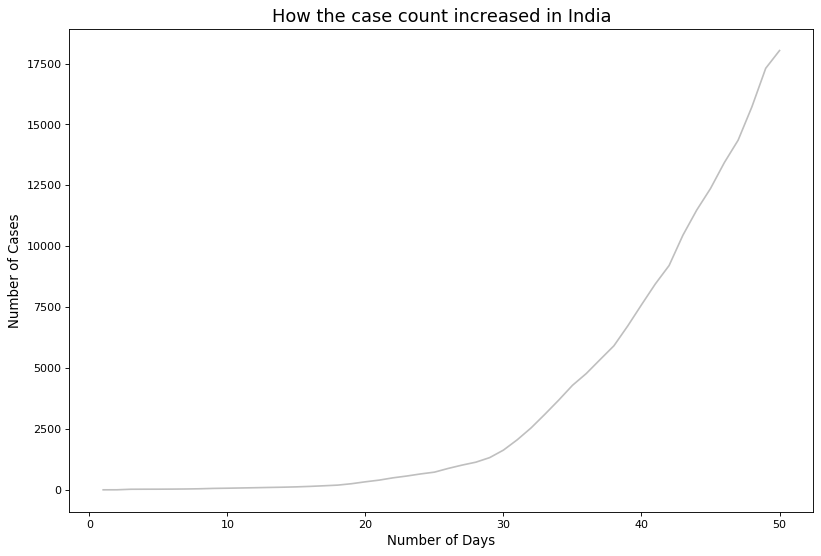

In [6]:
#curve inclined in the interval 20-30
ind_grouped_date = ind_grouped_date.iloc[3:]
ind_grouped_date.reset_index(inplace = True)
ind_grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
ind_grouped_date['Day Number'] = ind_grouped_date['Day Number'] - 2
ind_grouped_date
plt.figure(figsize=(12,8), dpi=80)
plt.plot(ind_grouped_date['Day Number'],ind_grouped_date['Cumulative Count'], color="grey", alpha = 0.5)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('How the case count increased in India', size=16)
plt.show()

In [15]:
#grouping the data in terms of different states
#Maharashtra
covid_mh = covid_data[covid_data['State/UnionTerritory'] == "Maharashtra"]
covid_mh.head()
covid_mh.reset_index(inplace = True)
covid_mh = covid_mh.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_mh.reset_index(inplace = True)
covid_mh.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_mh['Day Count'] = covid_mh['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Maharashtra"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_mh = covid_mh.append(missing_values, ignore_index = True)
covid_mh = covid_mh.sort_values(by="Day Count", ascending = True)
covid_mh.reset_index(drop=True, inplace=True)
print(covid_mh.shape)
covid_mh.head()

(282, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Maharashtra,0,0
1,2,03/03/20,Maharashtra,0,0
2,3,04/03/20,Maharashtra,0,0
3,4,05/03/20,Maharashtra,0,0
4,5,06/03/20,Maharashtra,0,0


In [4]:
covid_ka = covid_data[covid_data['State/UnionTerritory'] == "Karnataka"]
covid_ka.head()
covid_ka.reset_index(inplace = True)
covid_ka = covid_ka.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_ka.reset_index(inplace = True)
covid_ka.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_ka['Day Count'] = covid_ka['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Karnataka"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_ka = covid_ka.append(missing_values, ignore_index = True)
covid_ka = covid_ka.sort_values(by="Day Count", ascending = True)
covid_ka.reset_index(drop=True, inplace=True)
print(covid_ka.shape)
covid_ka.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Karnataka,0,0
1,2,03/03/20,Karnataka,0,0
2,3,04/03/20,Karnataka,0,0
3,4,05/03/20,Karnataka,0,0
4,5,06/03/20,Karnataka,0,0


In [6]:
covid_ap = covid_data[covid_data['State/UnionTerritory'] == "Andhra Pradesh"]
covid_ap.head()
covid_ap.reset_index(inplace = True)
covid_ap = covid_ap.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_ap.reset_index(inplace = True)
covid_ap.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_ap['Day Count'] = covid_ap['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Andhra Pradesh"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_ap = covid_ap.append(missing_values, ignore_index = True)
covid_ap = covid_ap.sort_values(by="Day Count", ascending = True)
covid_ap.reset_index(drop=True, inplace=True)
print(covid_ap.shape)
covid_ap.head()

(280, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Andhra Pradesh,0,0
1,2,03/03/20,Andhra Pradesh,0,0
2,3,04/03/20,Andhra Pradesh,0,0
3,4,05/03/20,Andhra Pradesh,0,0
4,5,06/03/20,Andhra Pradesh,0,0


In [7]:
covid_tn = covid_data[covid_data['State/UnionTerritory'] == "Tamil Nadu"]
covid_tn.head()
covid_tn.reset_index(inplace = True)
covid_tn = covid_tn.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_tn.reset_index(inplace = True)
covid_tn.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_tn['Day Count'] = covid_tn['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Tamil Nadu"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_tn = covid_tn.append(missing_values, ignore_index = True)
covid_tn = covid_tn.sort_values(by="Day Count", ascending = True)
covid_tn.reset_index(drop=True, inplace=True)
print(covid_tn.shape)
covid_tn.head()

(285, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Tamil Nadu,0,0
1,2,03/03/20,Tamil Nadu,0,0
2,3,04/03/20,Tamil Nadu,0,0
3,4,05/03/20,Tamil Nadu,0,0
4,5,06/03/20,Tamil Nadu,0,0


In [8]:
#Kerela
covid_kl = covid_data[covid_data['State/UnionTerritory'] == "Kerala"]
covid_kl = covid_kl.iloc[32:]
covid_kl.reset_index(inplace = True)
covid_kl = covid_kl.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid_kl.reset_index(inplace = True)
covid_kl.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_kl['Day Count'] = covid_kl['Day Count'] + 1
print(covid_kl.shape)
covid_kl.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [9]:
covid_dl = covid_data[covid_data['State/UnionTerritory'] == "Delhi"]
covid_dl.reset_index(inplace = True)
covid_dl = covid_dl.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid_dl.reset_index(inplace = True)
covid_dl.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_dl['Day Count'] = covid_dl['Day Count'] + 1
print(covid_dl.shape)
covid_dl.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [10]:
covid_up = covid_data[covid_data['State/UnionTerritory'] == "Uttar Pradesh"]
covid_up.head()
covid_up.reset_index(inplace = True)
covid_up = covid_up.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_up.reset_index(inplace = True)
covid_up.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_up['Day Count'] = covid_up['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Uttar Pradesh"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_up = covid_up.append(missing_values, ignore_index = True)
covid_up = covid_up.sort_values(by="Day Count", ascending = True)
covid_up.reset_index(drop=True, inplace=True)
print(covid_up.shape)
covid_up.head()

(288, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Uttar Pradesh,0,0
1,2,03/03/20,Uttar Pradesh,0,0
2,3,04/03/20,Uttar Pradesh,0,0
3,4,05/03/20,Uttar Pradesh,0,0
4,5,06/03/20,Uttar Pradesh,0,0


In [11]:
covid_wb = covid_data[covid_data['State/UnionTerritory'] == "West Bengal"]
covid_wb.head()
covid_wb.reset_index(inplace = True)
covid_wb = covid_wb.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_wb.reset_index(inplace = True)
covid_wb.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_wb['Day Count'] = covid_wb['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["West Bengal"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_wb = covid_wb.append(missing_values, ignore_index = True)
covid_wb = covid_wb.sort_values(by="Day Count", ascending = True)
covid_wb.reset_index(drop=True, inplace=True)
print(covid_wb.shape)
covid_wb.head()

(274, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,West Bengal,0,0
1,2,03/03/20,West Bengal,0,0
2,3,04/03/20,West Bengal,0,0
3,4,05/03/20,West Bengal,0,0
4,5,06/03/20,West Bengal,0,0


In [12]:
covid_od = covid_data[covid_data['State/UnionTerritory'] == "Odisha"]
covid_od.head()
covid_od.reset_index(inplace = True)
covid_od = covid_od.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid_od.reset_index(inplace = True)
covid_od.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_od['Day Count'] = covid_od['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Odisha"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid_od = covid_od.append(missing_values, ignore_index = True)
covid_od = covid_od.sort_values(by="Day Count", ascending = True)
covid_od.reset_index(drop=True, inplace=True)
print(covid_od.shape)
covid_od.head()

(276, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Odisha,0,0
1,2,03/03/20,Odisha,0,0
2,3,04/03/20,Odisha,0,0
3,4,05/03/20,Odisha,0,0
4,5,06/03/20,Odisha,0,0


In [17]:
covid_rajasthan = covid_data[covid_data['State/UnionTerritory'] == "Rajasthan"]
covid_rajasthan.reset_index(inplace = True)
covid_rajasthan = covid_rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid_rajasthan.reset_index(inplace = True)
covid_rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid_rajasthan['Day Count'] = covid_rajasthan['Day Count'] + 2
missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})
covid_rajasthan = covid_rajasthan.append(missing_values, ignore_index = True)
covid_rajasthan = covid_rajasthan.sort_values(by="Day Count", ascending = True)
covid_rajasthan.reset_index(drop=True, inplace=True)
print(covid_rajasthan.shape)
covid_rajasthan.head()

(283, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,03/03/20,Rajasthan,0,1
2,3,04/03/20,Rajasthan,0,15
3,4,05/03/20,Rajasthan,0,15
4,5,06/03/20,Rajasthan,0,15


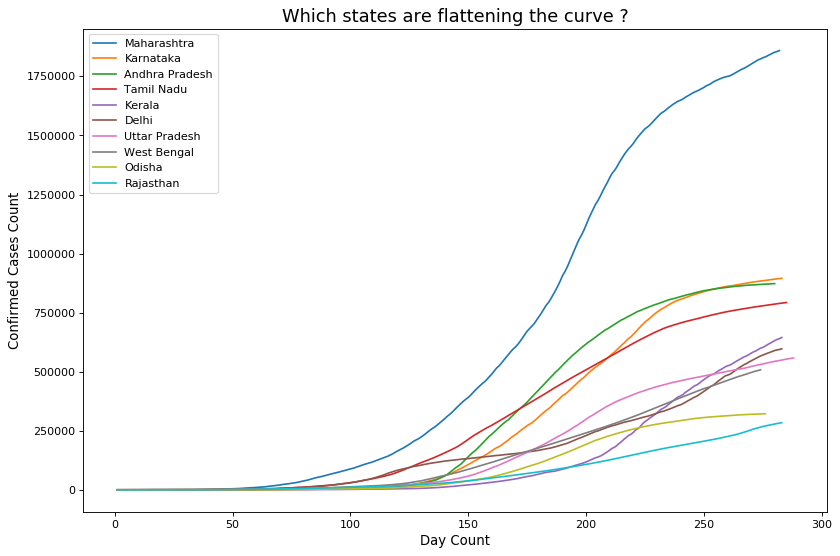

In [18]:
#curve of Maharashtra is the most curvy and that of Gujarat is most flat
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid_mh['Day Count'], covid_mh['Confirmed'])
plt.plot(covid_ka['Day Count'], covid_ka['Confirmed'])
plt.plot(covid_ap['Day Count'], covid_ap['Confirmed'])
plt.plot(covid_tn['Day Count'], covid_tn['Confirmed'])
plt.plot(covid_kl['Day Count'], covid_kl['Confirmed'])
plt.plot(covid_dl['Day Count'], covid_dl['Confirmed'])
plt.plot(covid_up['Day Count'], covid_up['Confirmed'])
plt.plot(covid_wb['Day Count'], covid_wb['Confirmed'])
plt.plot(covid_od['Day Count'], covid_od['Confirmed'])
plt.plot(covid_rajasthan['Day Count'], covid_rajasthan['Confirmed'])
plt.legend(['Maharashtra','Karnataka','Andhra Pradesh','Tamil Nadu','Kerala','Delhi','Uttar Pradesh', 'West Bengal', 'Odisha', 'Rajasthan'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()
#This is the analysis based on 10 cities which are mostly affected by the virus in India
#here we can observe that the cities which have more flattened curve have less number of cases. So in order to reduce the effect of corona virus we must apply measures to flatten the curve.